# Model (road accidents in Belgium 2005-2018)

## 1. Imports

In [108]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import os

In [2]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [10]:
df = pd.read_csv('numeric_accidents_data.csv')

In [11]:
df.shape

(617972, 15)

In [12]:
df.head()

,hour,dow,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
4,19,2,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1


In [13]:
df.columns

Index(['hour', 'dow', 'where', 'how', 'illumination', 'typeofroad',
       'refnismun', 'refnisdist', 'refnisprov', 'refnisgew', 'dead',
       'deadafter30d', 'month', 'year', 'quarter'],
      dtype='object')

## 2. Dealing with missing data

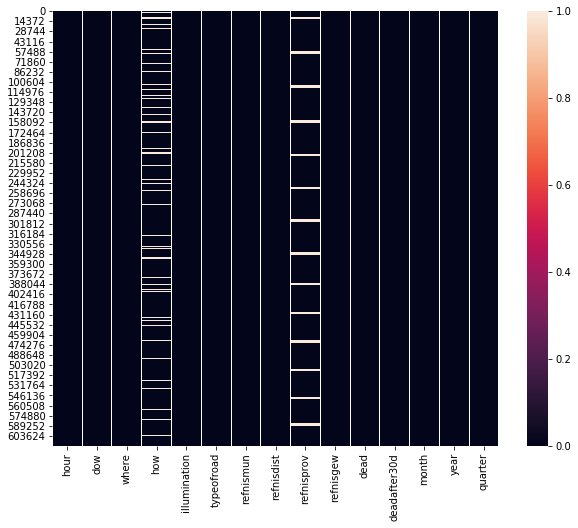

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617972 entries, 0 to 617971
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hour          617972 non-null  int64  
 1   dow           617972 non-null  int64  
 2   where         617972 non-null  float64
 3   how           541110 non-null  float64
 4   illumination  617972 non-null  float64
 5   typeofroad    617972 non-null  float64
 6   refnismun     617972 non-null  int64  
 7   refnisdist    617972 non-null  int64  
 8   refnisprov    564427 non-null  float64
 9   refnisgew     617972 non-null  int64  
 10  dead          617972 non-null  int64  
 11  deadafter30d  617972 non-null  int64  
 12  month         617972 non-null  int64  
 13  year          617972 non-null  int64  
 14  quarter       617972 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 70.7 MB


In [16]:
df['how'].isnull().sum()

76862

In [21]:
print('Missing data in the how column is: ~'+str(round(((df['how'].isnull().sum())/(617972))*100))+'%') 

Missing data in the how column is: ~12.0%


In [22]:
print('Missing data in the refnisprov column is: ~'+str(round(((df['refnisprov'].isnull().sum())/(617972))*100))+'%') 

Missing data in the refnisprov column is: ~9.0%


#### -Let's look for correlation with other column(s) to replace the missing values. 
#### -'refnismun' should have perfect correlation with refnisprov.

In [23]:
df_cor = df[['refnismun','refnisprov']]

In [24]:
corrMatrix_ = df_cor.corr()

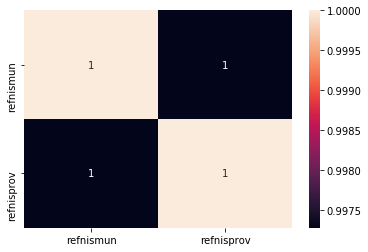

In [25]:
sns.heatmap(corrMatrix_,annot=True)

In [26]:
empty_prov = df_cor[df_cor['refnisprov'].isnull()]

In [27]:
empty_prov

,refnismun,refnisprov
8648,21001,NaN
8649,21001,NaN
8650,21001,NaN
8651,21001,NaN
8652,21001,NaN
...,...,...
590266,21019,NaN
590267,21019,NaN
590268,21019,NaN
590269,21019,NaN


In [28]:
empty_prov['refnismun'].unique()

array([21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009,
       21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018,
       21019], dtype=int64)

In [29]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [30]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Geoplot')

In [31]:
df_refnis = pd.read_excel('refnis.xlsx')

In [32]:
#remove french columns
df_refnis = df_refnis.drop(['Code INS','Entités administratives','Langue'], axis=1)

In [33]:
df_refnis

,Code NIS,Administratieve eenheden,Taal
0,1000,HET RIJK,NaN
1,4000,BRUSSELS HOOFDSTEDELIJK GEWEST,NaN
2,21000,Arrondissement Brussel Hoofdstad,NaN
3,21001,Anderlecht,NaN
4,21002,Oudergem,NF
...,...,...,...
641,93018,Doische,F
642,93022,Florennes,F
643,93056,Philippeville,F
644,93090,Viroinval,F


In [34]:
list_prov = [21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009,
       21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018,
       21019]

In [36]:
def printforme(x):
    
    for y in x:
        print(str(y)+' = '+str(df_refnis[df_refnis['Code NIS']==y]['Administratieve eenheden']))

printforme(list_prov)

21001 = 3    Anderlecht
Name: Administratieve eenheden, dtype: object
21002 = 4    Oudergem
Name: Administratieve eenheden, dtype: object
21003 = 5    Sint-Agatha-Berchem
Name: Administratieve eenheden, dtype: object
21004 = 6    Brussel
Name: Administratieve eenheden, dtype: object
21005 = 7    Etterbeek
Name: Administratieve eenheden, dtype: object
21006 = 8    Evere
Name: Administratieve eenheden, dtype: object
21007 = 9    Vorst
Name: Administratieve eenheden, dtype: object
21008 = 10    Ganshoren
Name: Administratieve eenheden, dtype: object
21009 = 11    Elsene
Name: Administratieve eenheden, dtype: object
21010 = 12    Jette
Name: Administratieve eenheden, dtype: object
21011 = 13    Koekelberg
Name: Administratieve eenheden, dtype: object
21012 = 14    Sint-Jans-Molenbeek
Name: Administratieve eenheden, dtype: object
21013 = 15    Sint-Gillis
Name: Administratieve eenheden, dtype: object
21014 = 16    Sint-Joost-ten-Node
Name: Administratieve eenheden, dtype: object
21015 = 17 

#### -Turns out all missing data in refnisprov should be the Brussels Capital Region.
#### -Replace them with NIS Brussels Capital Region = 4000. 

In [37]:
def replace_nan(x):    
     
    if pd.isnull(x):
        return 4000
    else:
        return x

In [38]:
df['refnisprov']=df['refnisprov'].apply(replace_nan)

In [39]:
df['refnisprov'].isnull().sum()

0

In [40]:
#df[df['refnisprov']==4000]

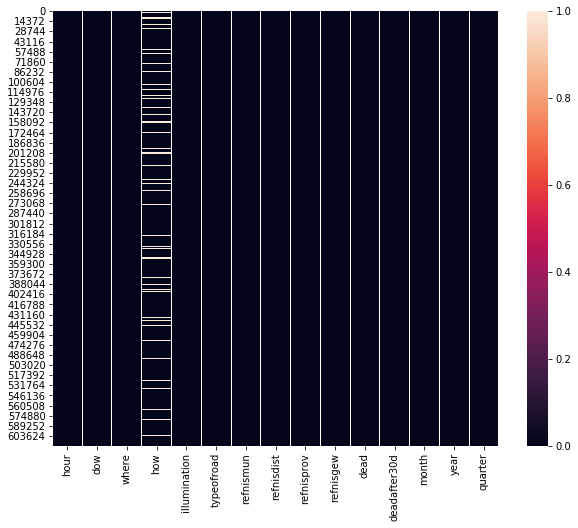

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [42]:
corr_with_how = df.corrwith(df['how'])

In [43]:
corr_with_how.sort_values(ascending=False)

how             1.000000
illumination    0.175358
refnismun       0.124410
refnisdist      0.124369
refnisprov      0.118298
dow             0.096691
where           0.092684
refnisgew       0.090543
deadafter30d    0.049215
dead            0.045864
year           -0.004144
quarter        -0.004944
month          -0.006420
typeofroad     -0.070383
hour           -0.105723
dtype: float64

#### -Correlation with other predictor too low to fill up the NaN's in the 'how' column 

#### -Remove rows in dataset with NaN for 'how'

In [44]:
df=df.dropna()

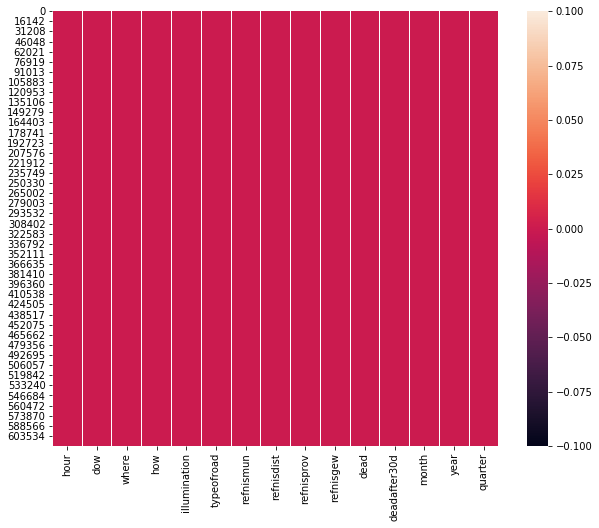

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

#### -No more missing values

In [47]:
df.isnull().sum().max()

0

In [48]:
df.head()

,hour,dow,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
1,16,3,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
2,16,2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
3,24,2,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1
4,19,2,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,1,2005,1


## 3. Refnis choise

In [49]:
df['refnismun'].nunique()

589

In [50]:
df['refnisdist'].nunique()

43

#### -Let's start to build a model per province, later move up in quantity (dist and mun)

In [51]:
df['refnisprov'].nunique()

11

In [52]:
df['refnisgew'].nunique()

3

## 4. Scaling down to prevent high values to dominate the fitting

In [54]:
df = df.drop(['refnismun','refnisdist','refnisgew'],axis=1)

df['refnisprov'] = df['refnisprov'].replace({4000.0:'1',
                                            10000.0:'2',
                                            20001.0:'3',
                                            20002.0:'4',
                                            30000.0:'5',
                                            40000.0:'6',
                                            50000.0:'7',
                                            60000.0:'8',
                                            70000.0:'9',
                                            80000.0:'10',
                                            90000.0:'11',})

df['year'] = df['year'].replace({2005:'5',
                                2006:'6',
                                2007:'7',
                                2008:'8',
                                2009:'9',
                                2010:'10',
                                2011:'11',
                                2012:'12',
                                2013:'13',
                                2014:'14',
                                2015:'15',
                                2016:'16',
                                2017:'17',
                                2018:'18'})


## 5. Balancing dataset 

In [109]:
df.head()

,hour,dow,where,how,illumination,typeofroad,refnisprov,dead,deadafter30d,month,year,quarter
0,10,2,2.0,4.0,1.0,2.0,2,0,0,1,5,1
1,16,3,1.0,4.0,1.0,2.0,2,0,0,1,5,1
2,16,2,1.0,4.0,1.0,2.0,2,0,0,1,5,1
3,24,2,1.0,7.0,3.0,2.0,2,0,0,1,5,1
4,19,2,2.0,4.0,3.0,2.0,2,0,0,1,5,1


In [113]:
df.columns 

Index(['hour', 'dow', 'where', 'how', 'illumination', 'typeofroad',
       'refnisprov', 'dead', 'deadafter30d', 'month', 'year', 'quarter'],
      dtype='object')

In [114]:
df.columns = ['hour', 'dow', 'where', 'how', 'illumination', 'typeofroad',
       'refnisprov', 'death', 'deathafter30d', 'month', 'year', 'quarter']

In [46]:
df['death'].value_counts()

0    532158
1      8951
2         1
Name: death, dtype: int64

In [115]:
df['deathafter30d'].value_counts()

0    530499
1     10610
2         1
Name: deathafter30d, dtype: int64

#### Remove the single  occurence of "2" for both

In [117]:
df= df[df.death != 2]

In [118]:
df= df[df.deathafter30d != 2]

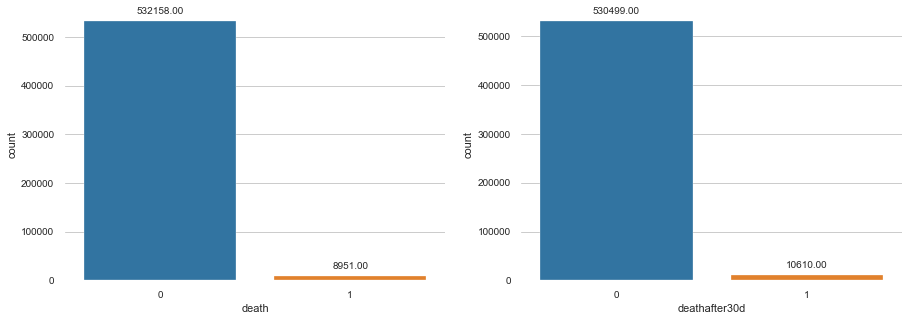

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))

splot = sns.countplot(df['death'],ax=ax1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
splot = sns.countplot(df['deathafter30d'],ax=ax2)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')    
    

In [157]:
print('Percentage of deaths in dataset (value = 1) = '+ str((((df['death']==1).sum())/(len(df['death'])))*100)+'%') 

Percentage of deaths in dataset (value = 1) = 1.654195365443931%


### Dataset dependent variable not well balanced (luckily, as few fatalities as possible) 

##### -Unbalanced dataset is not good to train a model, will make (random) buckets of the death = 0 cases and train these against the death = 1 cases.

In [222]:
len(df[df['death']==0])

532158

In [225]:
len(df[df['death']==1])

8951

In [226]:
len(df[df['death']==0])/len(df[df['death']==1])

59.45235169254832

#### Make 59 random buckets with each 8951 alive samples

In [227]:
bucket_death = df[df['death']==1]

In [166]:
alive_bucket_list = {}

def generate_alive_buckets():
    for bucket in np.arange(1,59,1):
        alive_bucket_list[bucket] = df[df['death']==0].sample(n=8951) # df.sample = return a random sample of items from an axis of object.
    print('Function is finished')

generate_alive_buckets()

#### Append the 'bucket_death' to all the 59 alive buckets

In [168]:
final_bucket_list = {}

def append_alive_death_buckets():
    for x in np.arange(1,59,1):
        final_bucket_list[x] = alive_bucket_list[x].append(bucket_death)
    print('Function is finished')

append_alive_death_buckets()

In [174]:
#Check one bucket as example
final_bucket_list[8].head(5)

,hour,dow,where,how,illumination,typeofroad,refnisprov,death,deathafter30d,month,year,quarter
219011,10,1,1.0,2.0,1.0,2.0,6,0,0,1,9,1
472252,16,1,1.0,4.0,1.0,2.0,5,0,0,9,15,3
17780,18,2,2.0,4.0,3.0,2.0,5,0,0,12,5,4
441485,23,7,1.0,8.0,3.0,2.0,6,0,0,5,14,2
558660,13,3,2.0,3.0,1.0,1.0,6,0,0,5,17,2


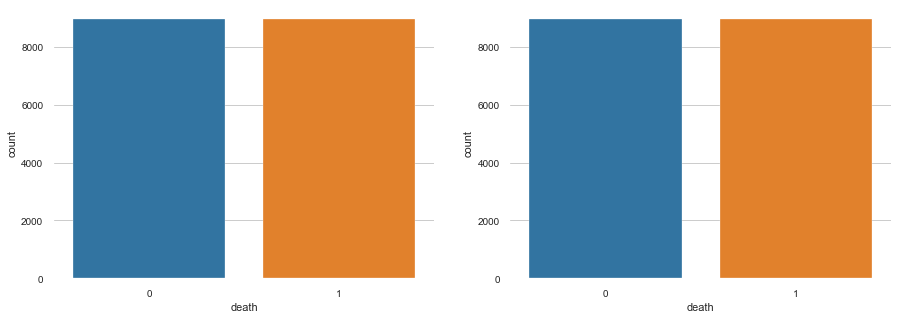

In [175]:
#check balance of 2 buckets
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
sns.countplot(final_bucket_list[1]['death'],ax=ax1)        
sns.countplot(final_bucket_list[55]['death'],ax=ax2)      

In [176]:
type(final_bucket_list[1])

pandas.core.frame.DataFrame

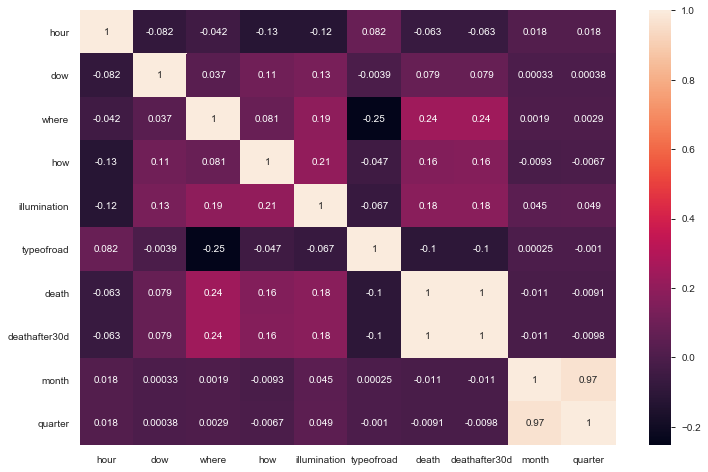

In [177]:
plt.figure(figsize=[12,8])
sns.heatmap(final_bucket_list[1].corr(),annot=True)

In [122]:
final_bucket_list[1].columns

Index(['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'death',
       'deathafter30d', 'mortallyinjured', 'severelyinjured', 'month', 'year',
       'quarter', 'dayow', 'hr'],
      dtype='object')

#### Check correlations with death for a randomly selected bucket

In [184]:
buck = final_bucket_list[2][['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dow', 'hour','death']]

In [192]:
cm = buck.corr()

In [198]:
cm.nlargest(8, 'death')['death'].drop('death')

where           0.238193
illumination    0.173706
how             0.164386
dow             0.073495
month          -0.009563
hour           -0.066659
typeofroad     -0.098063
Name: death, dtype: float64

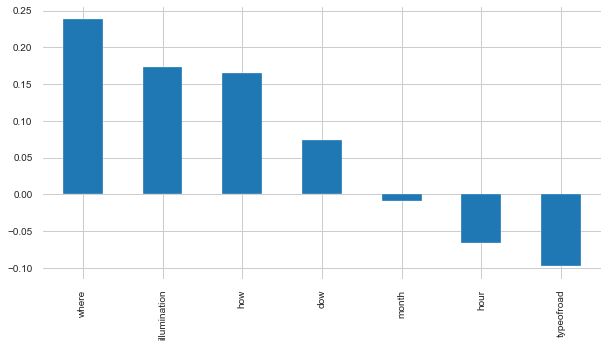

In [200]:
plt.figure(figsize=(10,5))
cm.nlargest(8, 'death')['death'].drop('death').plot(kind='bar')

#### Check correlations with deathafter30d for a randomly selected bucket

In [201]:
buck = final_bucket_list[2][['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dow', 'hour','deathafter30d']]

In [202]:
cm = buck.corr()

In [203]:
cm.nlargest(8, 'deathafter30d')['deathafter30d'].drop('deathafter30d')

where           0.238154
illumination    0.173706
how             0.165425
dow             0.073644
month          -0.009730
hour           -0.066886
typeofroad     -0.097768
Name: deathafter30d, dtype: float64

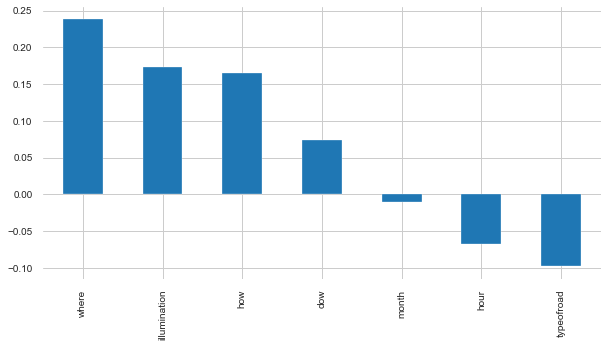

In [204]:
plt.figure(figsize=(10,5))
cm.nlargest(8, 'deathafter30d')['deathafter30d'].drop('deathafter30d').plot(kind='bar')

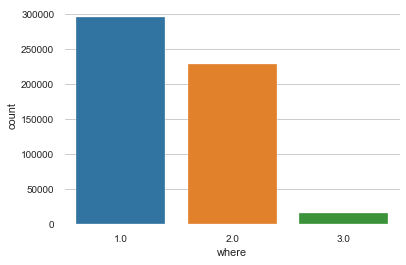

In [215]:
sns.countplot(df['where'])

1 = outside built-up area (buiten de bebouwde kom)<br>
2 = inside built-up area (binnen de bebouwde kom)<br>
3 = not available<br>

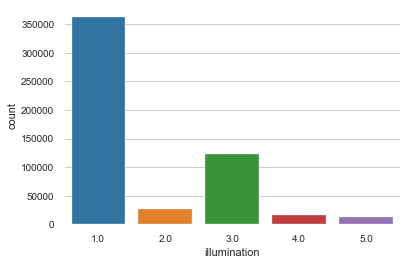

In [216]:
sns.countplot(df['illumination'])

1 = broad daylight, night<br>
2= lit public lighting<br>
3= not available<br>
4= dawn / dusk<br>
5= night / no public lighting<br>

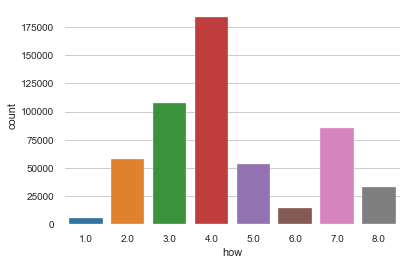

In [217]:
sns.countplot(df['how'])

1=Lateral<br>
2=Against an obstacle on the road<br>
3=Chain collision (4 drivers or more)<br>
4=From behind (or side by side)<br>
5=One driver/no obstacle<br>
6=Frontal impact (or when crossing)<br>
7=Against an obstacle on the road<br> 
8=With a pedestrian<br>

#### Will use only death as to be predicted in model,  since predictors have ~ same correlations with deathafter30days 

# 6. Logistic Regression

### Train test split, and train the model

In [228]:
X = final_bucket_list[1][['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dow', 'hour']]
y = final_bucket_list[1][['death']]

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.364, random_state=42)

### MinMaxScaler: transform features by scaling each feature to a given range

In [231]:
from sklearn.preprocessing import MinMaxScaler

Transforms the data in such a manner that it has mean as 0 and standard deviation of 1<br>
=It arranges the data in a standard normal distribution.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))<br>
X_scaled = X_std * (max - min) + min<br>
where min, max = feature_range.

In [232]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### predictions and Evaluations

In [235]:
predictions = logmodel.predict(X_test)

In [236]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [237]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      3266
           1       0.64      0.66      0.65      3251

    accuracy                           0.65      6517
   macro avg       0.65      0.65      0.65      6517
weighted avg       0.65      0.65      0.65      6517



Precision = True Positive / Total predicted Postives = 2133 / (2133+1105)

Recall = True Positive / Total Actual Positive = 2133 / (2133+1133)

In [238]:
from sklearn.metrics import plot_confusion_matrix

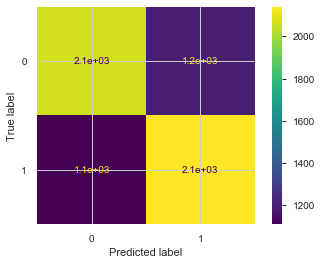

In [239]:
plot_confusion_matrix(logmodel,X_test,y_test)

In [240]:
print(confusion_matrix(y_test,predictions))

[[2068 1198]
 [1111 2140]]


 TP   FN<br>
 FP   TN<br>
 
 2133     |    1133 <br>
 1105     |    2146 <br>
 all 1's |   all 0's
 
 
 

-TP times it predicts correctly that an accident wil occur<br>
-FP times it predicts incorrectly that an accident will occur<br>
-FN times it predicts incorrectly there's no accident, while there is<br>
-TN times it predicts correctly that there won't be an accident<br>

# 7. Support Vector Machines

In [241]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### predictions and Evaluations

In [242]:
clf.score(X_test, y_test)

0.6311186128586773

In [243]:
from sklearn.model_selection import cross_val_score

In [244]:
clf = svm.SVC(kernel='linear', C=1)

In [245]:
scores = cross_val_score(clf, X, y, cv=5)

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

The mean score and the 95% confidence interval of the score estimate are hence given by:

In [246]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.20)


## best test_size?

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [248]:
X_train.shape, y_train.shape

((11994, 9), (11994, 1))

In [249]:
X_test.shape, y_test.shape

((5908, 9), (5908, 1))

In [250]:
X_test_shape = X_test.shape
X_train_shape = X_train.shape

In [251]:
X_test_shape[0]/(X_test_shape[0]+X_train_shape[0])

0.3300189922913641

Effect of varying test_size<br>
Not going >40% of the dataset<br>
The higher the test size, the smaller the training size...

In [252]:
list_plot = []

for alpha in  np.arange(0.005, 0.4, 0.005):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=alpha, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    list_plot.append(float(accuracy_score(y_test,predictions)))


C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

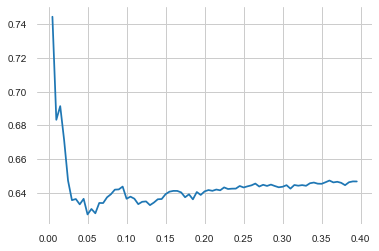

In [253]:
plt.plot(np.arange(0.005, 0.4, 0.005),list_plot)

In [254]:
size=np.arange(0.005, 0.4, 0.005)

In [255]:
performance = pd.DataFrame([size,list_plot])

In [256]:
performance = performance.transpose()

In [257]:
performance.columns = ['test size','accuracy_score']

In [258]:
performance = performance[performance['test size'].between(0.1, 0.4)]

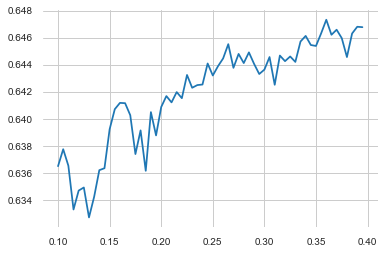

In [259]:
plt.plot(performance['test size'],performance['accuracy_score'])

In [260]:
performance['accuracy_score'].max()

0.6473235065942591

In [261]:
performance[performance['accuracy_score']==performance['accuracy_score'].max()]

,test size,accuracy_score
71,0.36,0.647324


## Let's automate 

#### For bucket 1:59<br>

1.Use these columns for X and y:<br>

X = final_bucket_list[x][['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dow', 'hour']]<br>
y = final_bucket_list[x]['death']<br><br>

2.Train/test split<br>
3.Scale the data<br>
4.Make the model<br>
5.Predict <br>
6.Plot accuracy score in function of bucket 1, bucket 2, ..... , bucket 58 and bucket 59<br>

In [263]:
accuracy_scores = []

for bucket in np.arange(1,59,1):
    
    current_bucket = final_bucket_list[bucket]
    
    X = current_bucket[['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dow', 'hour']]
    y = current_bucket['death']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    
    predictions = logmodel.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test,predictions))
    
print("I'm done")
    

I'm done


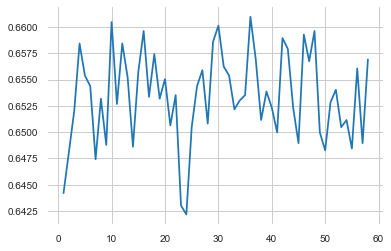

In [264]:
plt.plot(np.arange(1,59,1),accuracy_scores)

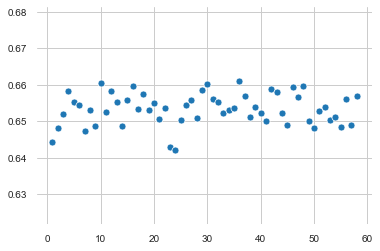

In [265]:
sns.scatterplot(np.arange(1,59,1),accuracy_scores)

In [266]:
max(accuracy_scores)

0.6609681787406906

In [267]:
min(accuracy_scores)

0.6421800947867299

Creating a model for 59 randomly different buckets gives the following accuracy_scores:

min ~64.5%<br>
max ~66.5%<br>
<br>
(new random buckets have been generated and gives ~ same accuracy_scores)

In [270]:
individual_test_X = current_bucket[['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dow', 'hour']]

In [271]:
individual_test_X = scaler.fit_transform(individual_test_X)

In [272]:
individual_test_y = current_bucket['death']

In [ ]:
# individual_prediction = logmodel.predict(individual_test_X[500])